# Machine Learning Major Project

In [254]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model

In [255]:
df=pd.read_csv("Downloads\\AirBNB.csv")

C:\Users\atk\AppData\Local\Temp\ipykernel_7904\3625299354.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Downloads\\AirBNB.csv")


In [256]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


## droping id column

In [257]:
df=df.drop('id',axis=1)

In [258]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


## replacing f,t with boolean.

In [260]:
df.instant_bookable.replace(['f','t'],[False,True],inplace=True  )

In [261]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,False,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,True,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,True,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,False,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,True,40.0,0.0,1.0,4.744932


In [262]:
df=pd.get_dummies(df,columns=['room_type','cancellation_policy','cleaning_fee','instant_bookable'],drop_first=True)

In [263]:
df.isnull().sum()

accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
instant_bookable_True               0
dtype: int64

## replacing null values with mean

In [264]:
for column in df.columns:
    if df[column].dtype !='object':
        mean=df[column].mean()
        df[column]=df[column].fillna(mean)

In [265]:
df.isnull().sum()

accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
instant_bookable_True           0
dtype: int64

In [266]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069,0.413366,0.029186,0.257182,0.438531,0.734021,0.262458
std,2.153559,0.581256,6.896002,0.851620,1.253033,0.717394,0.492441,0.168329,0.437083,0.496211,0.441856,0.439973
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,94.067365,1.000000,1.000000,4.709530,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [267]:
dups=df.duplicated()
print('Number of duplicate rows = %d'%(dups.sum()))

Number of duplicate rows = 19998


In [268]:
print('before duplicant',df.shape)
df.drop_duplicates(inplace=True)
print('after duplicant',df.shape)

before duplicant (74111, 12)
after duplicant (54113, 12)


In [269]:
dups=df.duplicated()
print('Number of duplicate rows = %d'%(dups.sum()))

Number of duplicate rows = 0


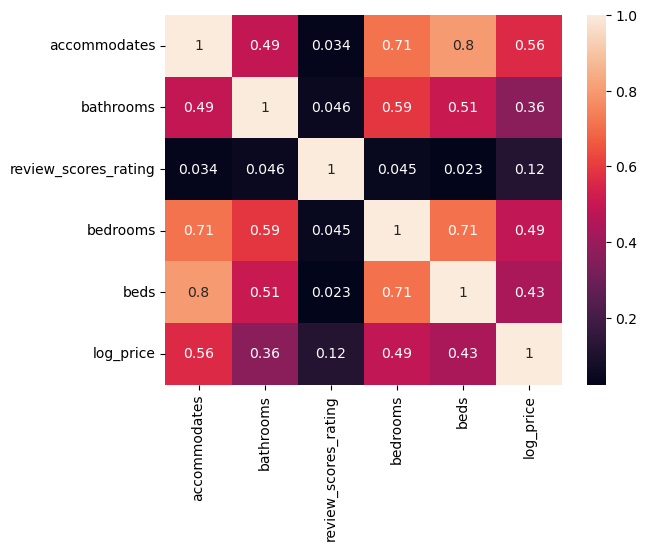

In [270]:
sns.heatmap(df.iloc[:,0:6].corr(),annot=True)
plt.show()

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54113 entries, 0 to 74110
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54113 non-null  float64
 1   bathrooms                     54113 non-null  float64
 2   review_scores_rating          54113 non-null  float64
 3   bedrooms                      54113 non-null  float64
 4   beds                          54113 non-null  float64
 5   log_price                     54113 non-null  float64
 6   room_type_Private room        54113 non-null  uint8  
 7   room_type_Shared room         54113 non-null  uint8  
 8   cancellation_policy_moderate  54113 non-null  uint8  
 9   cancellation_policy_strict    54113 non-null  uint8  
 10  cleaning_fee_True             54113 non-null  uint8  
 11  instant_bookable_True         54113 non-null  uint8  
dtypes: float64(6), uint8(6)
memory usage: 3.2 MB


## checking outliers.

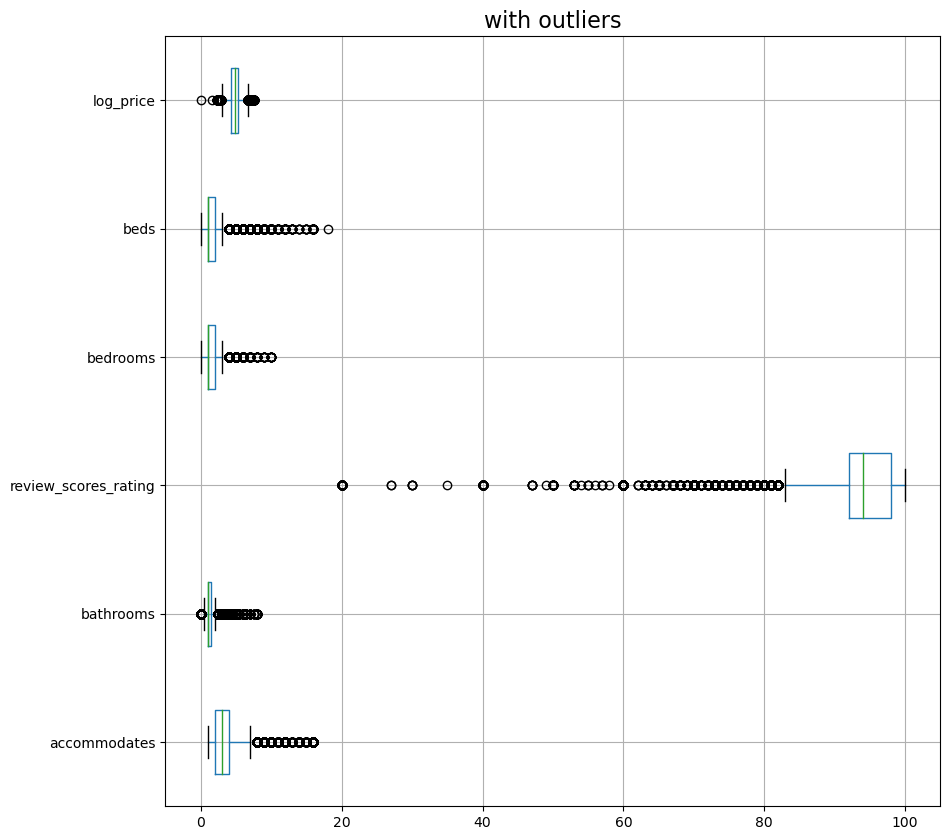

In [272]:
cont=df.dtypes[(df.dtypes!='uint8')&(df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('with outliers',fontsize=16)
plt.show()

## removing outliers

In [273]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q1+(1.5*IQR)
    return lower_range,upper_range

In [274]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

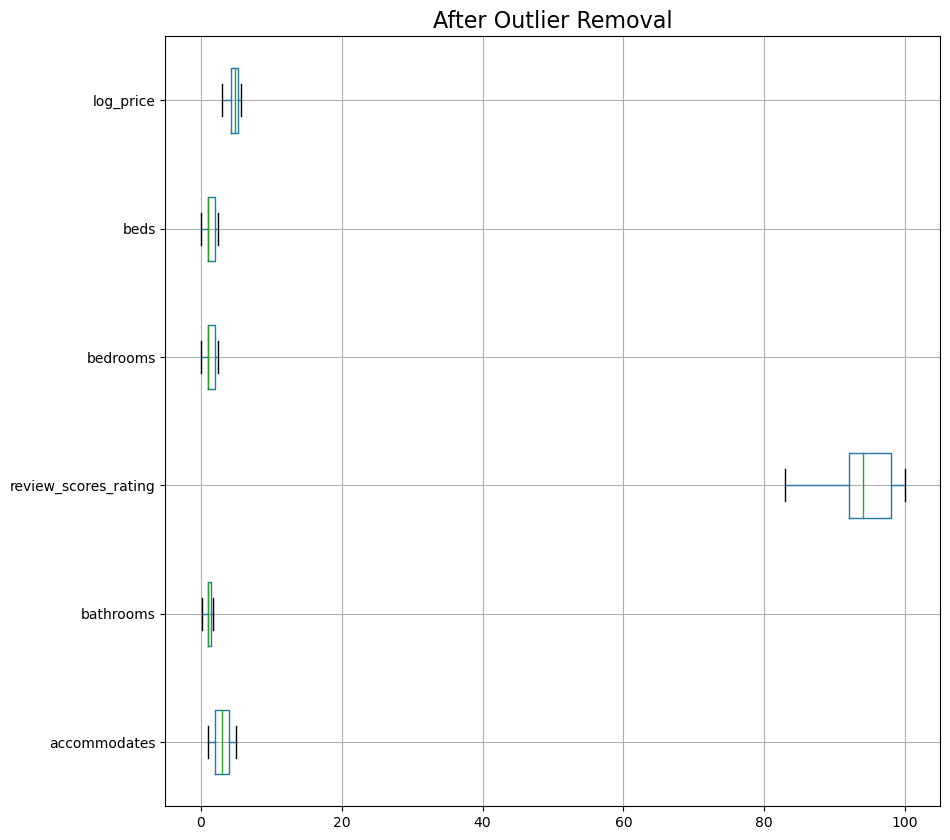

In [275]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

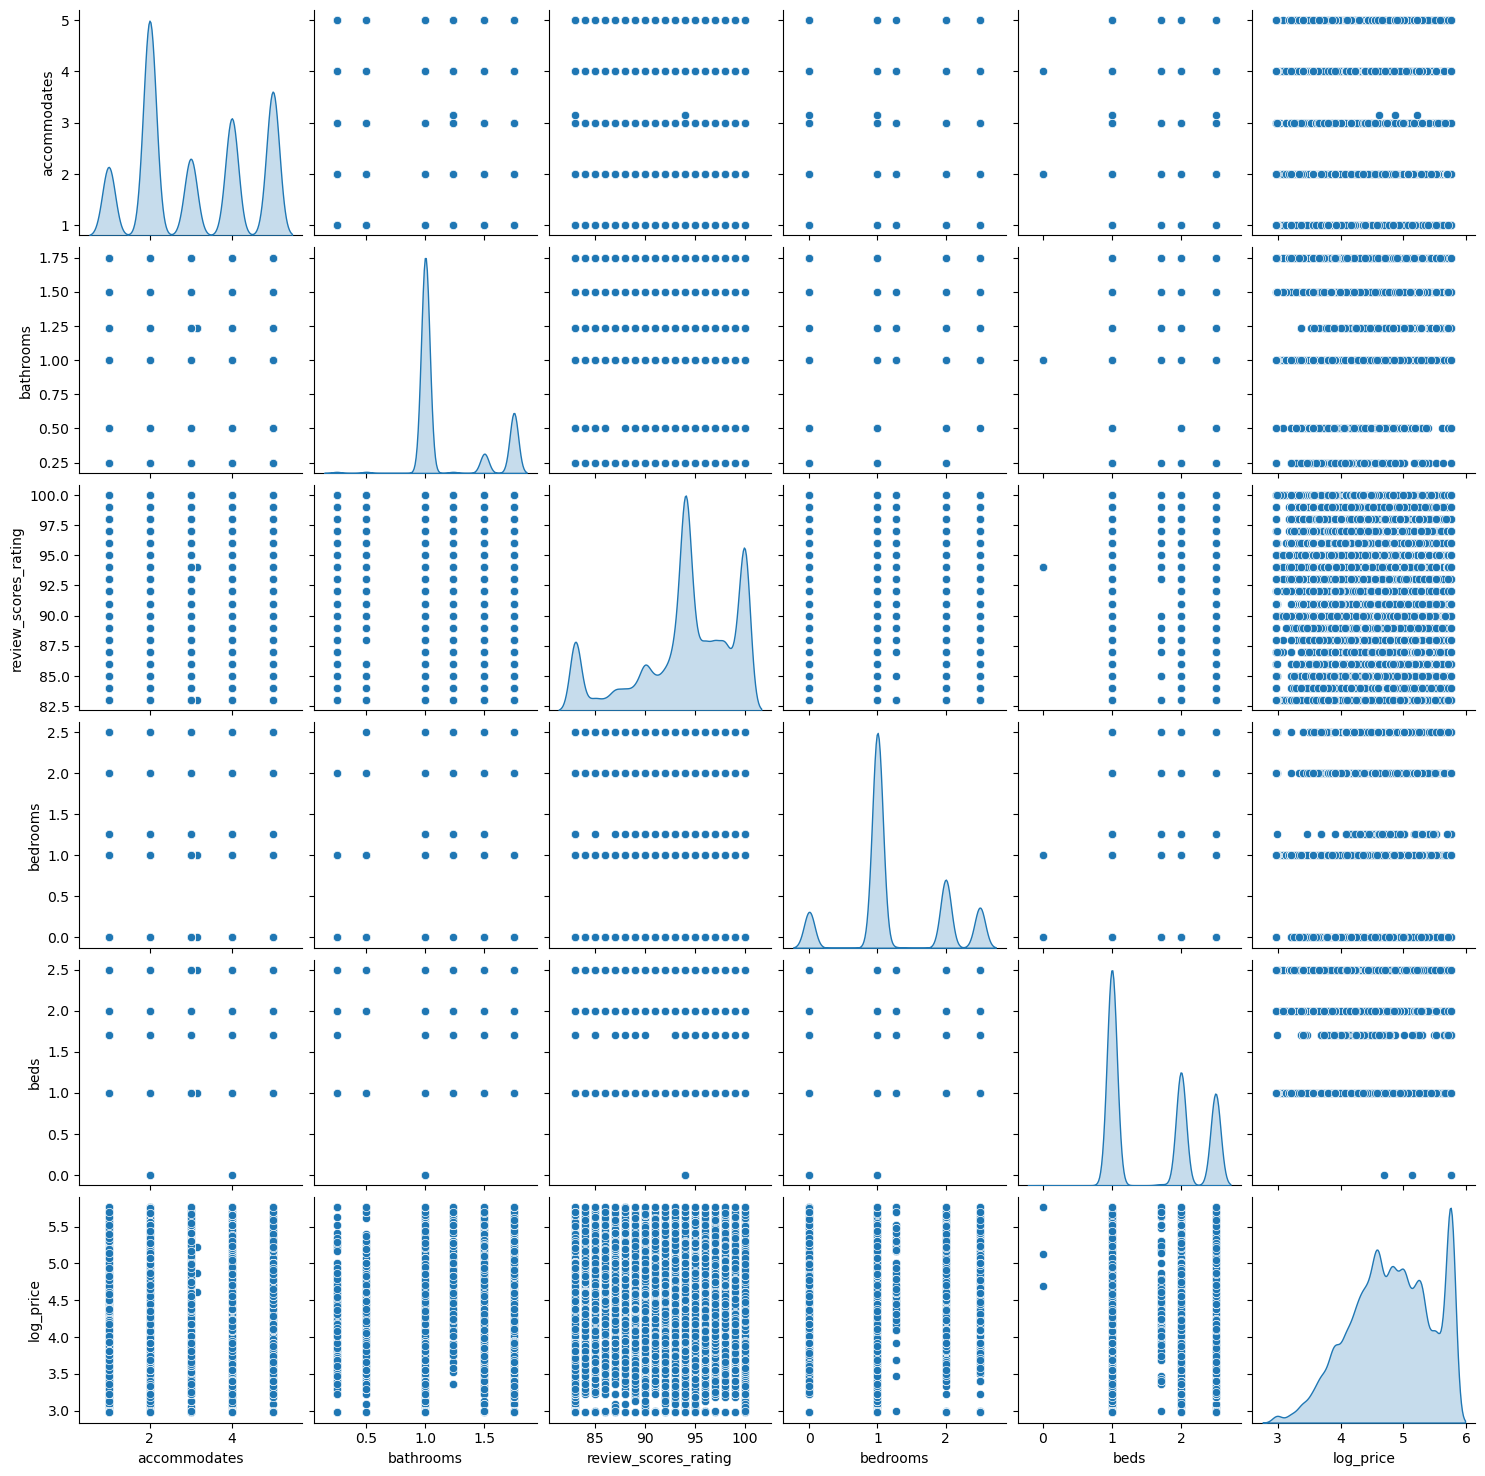

In [276]:
df_attr=(df[cont])
sns.pairplot(df_attr,diag_kind='kde')
plt.show()

# simple linear regression model

## simple linear model between accommodates and log price

In [277]:
accom_x=df[['accommodates']]
accom_y=df[['log_price']]

In [278]:
accom_x.head()

,accommodates
0,3.0
1,5.0
2,5.0
3,4.0
4,2.0


In [279]:
accom_y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,5.762752
4,4.744932


In [280]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1=train_test_split(accom_x,accom_y,test_size=0.25, random_state=1)

In [281]:
regression_model=LinearRegression()
regression_model.fit(x_train1,y_train1)

LinearRegression()

In [282]:
for idx, col_name in enumerate(x_train1.columns):
    print("the coefficient for {} is {} ".format(col_name, regression_model.coef_[0][idx]))

the coefficient for accommodates is 0.26819290940394197 


In [283]:
intercept=regression_model.intercept_[0]

print("The intercept for our model is {} ".format(intercept))

The intercept for our model is 3.9820152324596174 


In [284]:
a=regression_model.score(x_train1,y_train1)
b=regression_model.score(x_test1,y_test1)
a,b

(0.32732984583960467, 0.3263621889479138)

In [285]:
#RMSE training data
predicted_train1=regression_model.fit(x_train1,y_train1).predict(x_train1)
a=np.sqrt(metrics.mean_squared_error(y_train1,predicted_train1))
#RMSE testing data
predicted_test1=regression_model.fit(x_train1,y_train1).predict(x_test1)
b=np.sqrt(metrics.mean_squared_error(y_test1,predicted_test1))
a,b

(0.5283846478227993, 0.5277498435810539)

In [286]:
import statsmodels.api as sm
x_train1=sm.add_constant(x_train1)
x_test1=sm.add_constant(x_test1)
model1=sm.OLS(y_train1,y_train1).fit()
model1

In [287]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.005e+35
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:00:30   Log-Likelihood:                      1.3124e+06
No. Observations:               40584   AIC:                                 -2.625e+06
Df Residuals:                   40583   BIC:                                 -2.625e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_price      1.0000   2.23e-18   4.48e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                   165118.773   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5646.854
Skew:                          -0.249   Prob(JB):                         0.00
Kurtosis:                       1.242   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
#RMSE training data
predicted_train1=regression_model.fit(x_train1,y_train1).predict(x_train1)
np.sqrt(metrics.mean_squared_error(y_train1,predicted_train1))

0.5283846478227993

In [289]:
#RMSE tesating data
predicted_test1=regression_model.fit(x_train1,y_train1).predict(x_test1)
np.sqrt(metrics.mean_squared_error(y_test1,predicted_test1))

0.5277498435810539

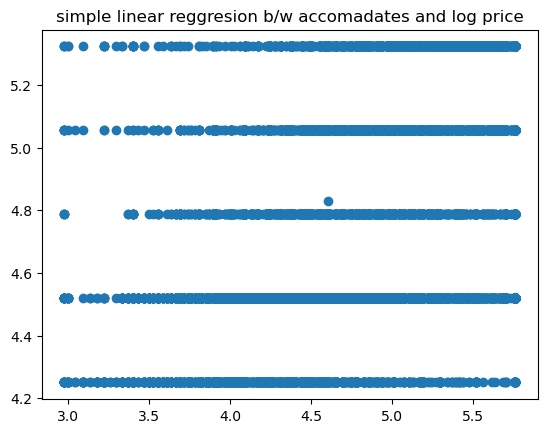

In [290]:
plt.title('simple linear reggresion b/w accomadates and log price')
plt.scatter(y_test1, predicted_test1)
plt.show()

In [291]:
for i,j in np.array(model1.params.reset_index()):
    print('({})*{}+'.format(round(j,2),i),end=' ')

(1.0)*log_price+ 

## simple linear regression b/w bathrooms and log price

In [292]:
bath_x=df[['bathrooms']]
bath_y=df[['log_price']]

In [293]:
bath_x.head()

,bathrooms
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [294]:
bath_y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,5.762752
4,4.744932


In [295]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2=train_test_split(bath_x,bath_y,test_size=0.25, random_state=1)

In [296]:
regression_model=LinearRegression()
regression_model.fit(x_train2,y_train2)

LinearRegression()

In [297]:
for idx, col_name in enumerate(x_train2.columns):
    print("the coefficient for {} is {} ".format(col_name, regression_model.coef_[0][idx]))

the coefficient for bathrooms is 0.5628696756318522 


In [298]:
intercept=regression_model.intercept_[0]

print("The intercept for our model is {} ".format(intercept))

The intercept for our model is 4.147722669266901 


In [299]:
regression_model.score(x_train2,y_train2)

0.07615957404152729

In [300]:
regression_model.score(x_test2,y_test2)

0.08674533094868098

In [301]:
#RMSE training data
predicted_train2=regression_model.fit(x_train2,y_train2).predict(x_train2)
np.sqrt(metrics.mean_squared_error(y_train2,predicted_train2))

0.6192237320604363

In [302]:
#RMSE testing data
predicted_test2=regression_model.fit(x_train2,y_train2).predict(x_test2)
np.sqrt(metrics.mean_squared_error(y_test2,predicted_test2))

0.6144843632469452

In [303]:
import statsmodels.api as sm
x_train2=sm.add_constant(x_train2)
x_test2=sm.add_constant(x_test2)
model2=sm.OLS(y_train2,y_train2).fit()
model2

In [304]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.005e+35
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:00:31   Log-Likelihood:                      1.3124e+06
No. Observations:               40584   AIC:                                 -2.625e+06
Df Residuals:                   40583   BIC:                                 -2.625e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_price      1.0000   2.23e-18   4.48e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                   165118.773   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5646.854
Skew:                          -0.249   Prob(JB):                         0.00
Kurtosis:                       1.242   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
#RMSE training data
predicted_train2=regression_model.fit(x_train2,y_train2).predict(x_train2)
np.sqrt(metrics.mean_squared_error(y_train2,predicted_train2))

0.6192237320604363

In [306]:
#RMSE tesating data
predicted_test2=regression_model.fit(x_train2,y_train2).predict(x_test2)
np.sqrt(metrics.mean_squared_error(y_test2,predicted_test2))

0.6144843632469452

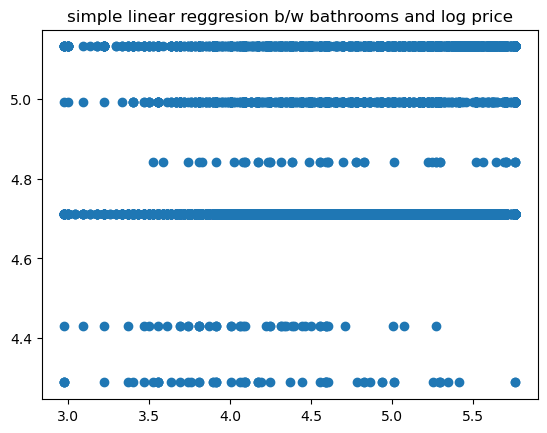

In [307]:
plt.title('simple linear reggresion b/w bathrooms and log price')
plt.scatter(y_test2, predicted_test2)
plt.show()

In [308]:
for i,j in np.array(model2.params.reset_index()):
    print('({})*{}+'.format(round(j,2),i),end=' ')

(1.0)*log_price+ 

## simple linear regression b/w review_scores_rating and log price

In [309]:
rev_x=df[['review_scores_rating']]
rev_y=df[['log_price']]

In [310]:
rev_x.head()

,review_scores_rating
0,100.000000
1,93.000000
2,92.000000
3,94.067365
4,83.000000


In [311]:
rev_y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,5.762752
4,4.744932


In [312]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3=train_test_split(rev_x,rev_y,test_size=0.25, random_state=1)

In [313]:
regression_model=LinearRegression()
regression_model.fit(x_train3,y_train3)

LinearRegression()

In [314]:
for idx, col_name in enumerate(x_train3.columns):
    print("the coefficient for {} is {} ".format(col_name, regression_model.coef_[0][idx]))

the coefficient for review_scores_rating is 0.016845921469801635 


In [315]:
intercept=regression_model.intercept_[0]

print("The intercept for our model is {} ".format(intercept))

The intercept for our model is 3.2268027320606114 


In [316]:
regression_model.score(x_train3,y_train3)

0.01652630483713724

In [317]:
regression_model.score(x_test3,y_test3)

0.01551858807709594

In [318]:
#RMSE training data
predicted_train3=regression_model.fit(x_train3,y_train3).predict(x_train3)
np.sqrt(metrics.mean_squared_error(y_train3,predicted_train3))

0.6388964654814521

In [319]:
#RMSE testing data
predicted_test3=regression_model.fit(x_train3,y_train3).predict(x_test3)
np.sqrt(metrics.mean_squared_error(y_test3,predicted_test3))

0.6379970132142322

In [320]:
import statsmodels.api as sm
x_train3=sm.add_constant(x_train3)
x_test3=sm.add_constant(x_test3)
model3=sm.OLS(y_train3,y_train3).fit()
model3

In [321]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.005e+35
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:00:32   Log-Likelihood:                      1.3124e+06
No. Observations:               40584   AIC:                                 -2.625e+06
Df Residuals:                   40583   BIC:                                 -2.625e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_price      1.0000   2.23e-18   4.48e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                   165118.773   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5646.854
Skew:                          -0.249   Prob(JB):                         0.00
Kurtosis:                       1.242   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [322]:
#RMSE training data
predicted_train3=regression_model.fit(x_train3,y_train3).predict(x_train3)
np.sqrt(metrics.mean_squared_error(y_train3,predicted_train3))

0.6388964654814521

In [323]:
#RMSE tesating data
predicted_test3=regression_model.fit(x_train3,y_train3).predict(x_test3)
np.sqrt(metrics.mean_squared_error(y_test3,predicted_test3))

0.6379970132142322

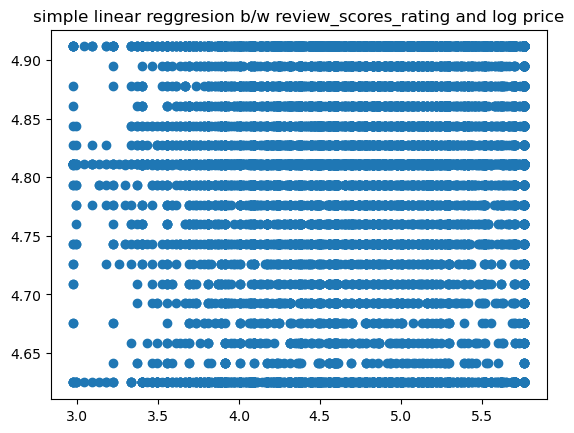

In [324]:
plt.title('simple linear reggresion b/w review_scores_rating and log price')
plt.scatter(y_test3, predicted_test3)
plt.show()

In [325]:
for i,j in np.array(model3.params.reset_index()):
    print('({})*{}+'.format(round(j,2),i),end=' ')

(1.0)*log_price+ 

## simple linear regression b/w bedrooms and log price

In [326]:
bed_x=df[['bedrooms']]
bed_y=df[['log_price']]

In [327]:
bed_x.head()

,bedrooms
0,1.0
1,2.5
2,1.0
3,2.0
4,0.0


In [328]:
bed_y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,5.762752
4,4.744932


In [329]:
from sklearn.model_selection import train_test_split
x_train4, x_test4, y_train4, y_test4=train_test_split(bed_x,bed_y,test_size=0.25, random_state=1)

In [330]:
regression_model=LinearRegression()
regression_model.fit(x_train4,y_train4)

LinearRegression()

In [331]:
for idx, col_name in enumerate(x_train4.columns):
    print("the coefficient for {} is {} ".format(col_name, regression_model.coef_[0][idx]))

the coefficient for bedrooms is 0.4001135347560951 


In [332]:
intercept=regression_model.intercept_[0]

print("The intercept for our model is {} ".format(intercept))

The intercept for our model is 4.308114924462779 


In [333]:
regression_model.score(x_train4,y_train4)

0.18301794231285862

In [334]:
regression_model.score(x_test4,y_test4)

0.18555678345219562

In [335]:
#RMSE training data
predicted_train4=regression_model.fit(x_train4,y_train4).predict(x_train4)
np.sqrt(metrics.mean_squared_error(y_train4,predicted_train4))

0.5823115049621626

In [336]:
#RMSE testing data
predicted_test4=regression_model.fit(x_train4,y_train4).predict(x_test4)
np.sqrt(metrics.mean_squared_error(y_test4,predicted_test4))

0.5802902725216795

In [337]:
import statsmodels.api as sm
x_train4=sm.add_constant(x_train4)
x_test4=sm.add_constant(x_test4)
model4=sm.OLS(y_train4,y_train4).fit()
model4

In [338]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.005e+35
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:00:32   Log-Likelihood:                      1.3124e+06
No. Observations:               40584   AIC:                                 -2.625e+06
Df Residuals:                   40583   BIC:                                 -2.625e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_price      1.0000   2.23e-18   4.48e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                   165118.773   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5646.854
Skew:                          -0.249   Prob(JB):                         0.00
Kurtosis:                       1.242   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [339]:
#RMSE training data
predicted_train4=regression_model.fit(x_train4,y_train4).predict(x_train4)
np.sqrt(metrics.mean_squared_error(y_train4,predicted_train4))

0.5823115049621626

In [340]:
#RMSE tesating data
predicted_test4=regression_model.fit(x_train4,y_train4).predict(x_test4)
np.sqrt(metrics.mean_squared_error(y_test4,predicted_test4))

0.5802902725216795

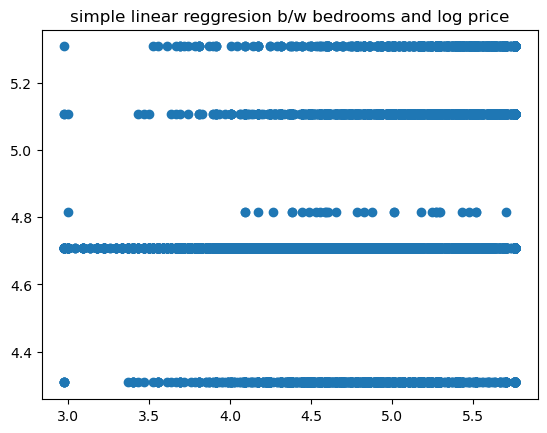

In [341]:
plt.title('simple linear reggresion b/w bedrooms and log price')
plt.scatter(y_test4, predicted_test4)
plt.show()

In [342]:
for i,j in np.array(model4.params.reset_index()):
    print('({})*{}+'.format(round(j,2),i),end=' ')

(1.0)*log_price+ 

 ## simple linear regression b/w beds and log price

In [343]:
beds_x=df[['beds']]
beds_y=df[['log_price']]

In [344]:
beds_x.head()

,beds
0,1.0
1,2.5
2,2.5
3,2.0
4,1.0


In [345]:
beds_y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,5.762752
4,4.744932


In [346]:
from sklearn.model_selection import train_test_split
x_train5, x_test5, y_train5, y_test5=train_test_split(beds_x,beds_y,test_size=0.25, random_state=1)

In [347]:
regression_model=LinearRegression()
regression_model.fit(x_train5,y_train5)

LinearRegression()

In [348]:
for idx, col_name in enumerate(x_train5.columns):
    print("the coefficient for {} is {} ".format(col_name, regression_model.coef_[0][idx]))

the coefficient for beds is 0.46142263527233124 


In [349]:
intercept=regression_model.intercept_[0]

print("The intercept for our model is {} ".format(intercept))

The intercept for our model is 4.074248157313374 


In [350]:
regression_model.score(x_train5,y_train5)

0.2072301929935494

In [351]:
regression_model.score(x_test5,y_test5)

0.21500762241713156

In [352]:
#RMSE training data
predicted_train5=regression_model.fit(x_train5,y_train5).predict(x_train5)
np.sqrt(metrics.mean_squared_error(y_train5,predicted_train5))

0.5736178562157978

In [353]:
#RMSE testing data
predicted_test5=regression_model.fit(x_train5,y_train5).predict(x_test5)
np.sqrt(metrics.mean_squared_error(y_test5,predicted_test5))

0.5697018176898193

In [354]:
import statsmodels.api as sm
x_train5=sm.add_constant(x_train5)
x_test5=sm.add_constant(x_test5)
model5=sm.OLS(y_train4,y_train5).fit()
model5

In [355]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.005e+35
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                        0.00
Time:                        22:00:33   Log-Likelihood:                      1.3124e+06
No. Observations:               40584   AIC:                                 -2.625e+06
Df Residuals:                   40583   BIC:                                 -2.625e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_price      1.0000   2.23e-18   4.48e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                   165118.773   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5646.854
Skew:                          -0.249   Prob(JB):                         0.00
Kurtosis:                       1.242   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [356]:
#RMSE training data
predicted_train5=regression_model.fit(x_train5,y_train5).predict(x_train5)
np.sqrt(metrics.mean_squared_error(y_train5,predicted_train5))

0.5736178562157978

In [357]:
#RMSE tesating data
predicted_test5=regression_model.fit(x_train5,y_train5).predict(x_test5)
np.sqrt(metrics.mean_squared_error(y_test5,predicted_test5))

0.5697018176898193

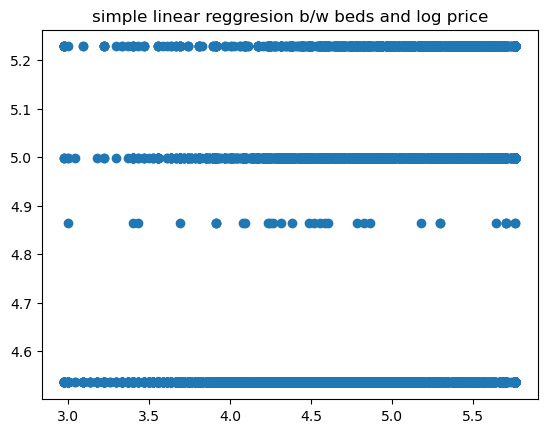

In [358]:
plt.title('simple linear reggresion b/w beds and log price')
plt.scatter(y_test5, predicted_test5)
plt.show()

In [359]:
for i,j in np.array(model5.params.reset_index()):
    print('({})*{}+'.format(round(j,2),i),end=' ')

(1.0)*log_price+ 

## Multiple Linear Regression model

In [360]:
X=df.drop('log_price',axis=1)

Y=df[['log_price']]


In [361]:
X.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.000000,1.0,1.0,0,0,0,1,1,0
1,5.0,1.0,93.000000,2.5,2.5,0,0,0,1,1,1
2,5.0,1.0,92.000000,1.0,2.5,0,0,1,0,1,1
3,4.0,1.0,94.067365,2.0,2.0,0,0,0,0,1,0
4,2.0,1.0,83.000000,0.0,1.0,0,0,1,0,1,1


In [362]:
Y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,5.762752
4,4.744932


In [363]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25, random_state=1)

In [364]:
regression_model=LinearRegression()
regression_model.fit(X_train,Y_train)

LinearRegression()

In [365]:
for idx, col_name in enumerate(X_train.columns):
    print("the coefficient for {} is {} ".format(col_name, regression_model.coef_[0][idx]))

the coefficient for accommodates is 0.09418423770031689 
the coefficient for bathrooms is 0.17785719627315438 
the coefficient for review_scores_rating is 0.010457969795645729 
the coefficient for bedrooms is 0.1420296425884404 
the coefficient for beds is -0.027149981773680932 
the coefficient for room_type_Private room is -0.5853540072471468 
the coefficient for room_type_Shared room is -1.0483730878810675 
the coefficient for cancellation_policy_moderate is -0.039115323276940124 
the coefficient for cancellation_policy_strict is 0.009152192160054256 
the coefficient for cleaning_fee_True is -0.044249222748569246 
the coefficient for instant_bookable_True is -0.05669502332367377 


In [366]:
intercept=regression_model.intercept_[0]

print("The intercept for our model is {} ".format(intercept))

The intercept for our model is 3.481232944863744 


In [367]:
#training data
regression_model.score(X_train,Y_train)

0.5134084951710205

In [368]:
#testing data
regression_model.score(X_test,Y_test)

0.5021076600214486

In [369]:
#RMSE training data
predicted_train=regression_model.fit(X_train,Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

0.44939824553412655

In [370]:
#RMSE tesating data
predicted_test=regression_model.fit(X_train,Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

0.4537144465057176

## Linear regression using statsmodels(ols)

In [371]:
import statsmodels.api as sm

In [372]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [373]:
model=sm.OLS(Y_train,X_train).fit()
model

In [374]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     3892.
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:00:34   Log-Likelihood:                -25125.
No. Observations:               40584   AIC:                         5.027e+04
Df Residuals:                   40572   BIC:                         5.038e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            3.4812      0.044     78.604      0.000       3.394       3.568
accommodates                     0.0942      0.003     31.396      0.000       0.088       0.100
bathrooms                        0.1779      0.008     21.662      0.000       0.162       0.194
review_scores_rating             0.0105      0.000     22.859      0.000       0.010       0.011
bedrooms                         0.1420      0.005     30.520      0.000       0.133       0.151
beds                            -0.0271      0.006     -4.579      0.000      -0.039      -0.016
room_type_Private room          -0.5854      0.006   -100.532      0.000      -0.597      -0.574
room_type_Shared room           -1.0484      0.013    -80.505      0.000      -1.074      -1.023
cancellation_policy_moderate    -0.0391      0.006     -6.225      0.000      -0.051      -0.027
cancellation_policy_strict       0.0092      0.006      1.602      0.109      -0.002       0.020
cleaning_fee_True               -0.0442      0.006     -8.030      0.000      -0.055      -0.033
instant_bookable_True           -0.0567      0.005    -11.580      0.000      -0.066      -0.047
==============================================================================
Omnibus:                      334.400   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.655
Skew:                           0.102   Prob(JB):                    2.31e-103
Kurtosis:                       3.488   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [375]:
#calculated MSE on train
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(Y_train,predicted_train)
np.sqrt(mse)#RMSE on train

0.4493982455341265

In [376]:
# Prediction on test data
Y_pred=model.predict(X_test)#calculate MSE on test
mse=metrics.mean_squared_error(Y_test,Y_pred)
np.sqrt(mse)#RMSE on test

0.4537144465057176

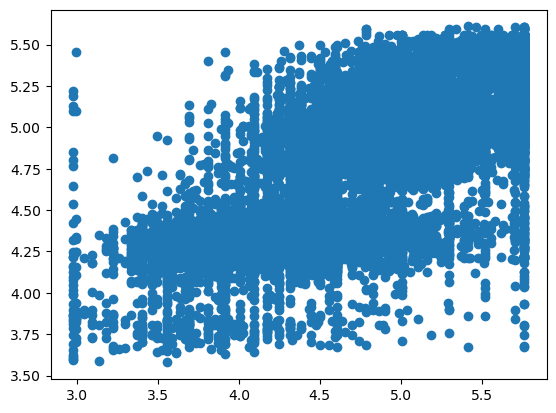

In [377]:
plt.scatter(Y_test, Y_pred)
plt.show()

## equation for multiple linear regression model

In [378]:
for i,j in np.array(model.params.reset_index()):
    print('({})*{}+'.format(round(j,2),i),end=' ')

(3.48)*const+ (0.09)*accommodates+ (0.18)*bathrooms+ (0.01)*review_scores_rating+ (0.14)*bedrooms+ (-0.03)*beds+ (-0.59)*room_type_Private room+ (-1.05)*room_type_Shared room+ (-0.04)*cancellation_policy_moderate+ (0.01)*cancellation_policy_strict+ (-0.04)*cleaning_fee_True+ (-0.06)*instant_bookable_True+ 

## insights


1)There is decrement in price of the property by a larger factor if the rooms are shared rather than private

2)There is decrement in price of the property by a larger factor if the property has a strict cancellation policy rather than a   moderate cancellation policy.

3)More the number of bedrooms/bathrooms the price of the property goes up a little

4)While morethe numbers of beds the price of property goes down a little